# 라이브러리 설정

In [1]:
# 한글 폰트 설정

import sys
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    !sudo apt-get -qq -y install fonts-nanum



    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [3]:
# 기본 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns

# 데이터셋 불러오기

In [6]:
# sklearn 라이브러리에서 당뇨병 데이터셋 로드
from sklearn import datasets
diabetes_data = datasets.load_diabetes()

# 딕셔너리 형태로 로드된 데이터의 키 값 확인
print(diabetes_data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
# 판다스 데이터프레임으로 변환
features = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
target = pd.DataFrame(diabetes_data['target'], columns=['Target'])

# 데이터셋 크기
print(features.shape)
print(target.shape)

(442, 10)
(442, 1)


In [5]:
# 데이터프레임 결합하기
df = pd.concat([features, target], axis=1)
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


# 데이터 탐색 (EDA)

In [6]:
# 데이터프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
# 통계 요약
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


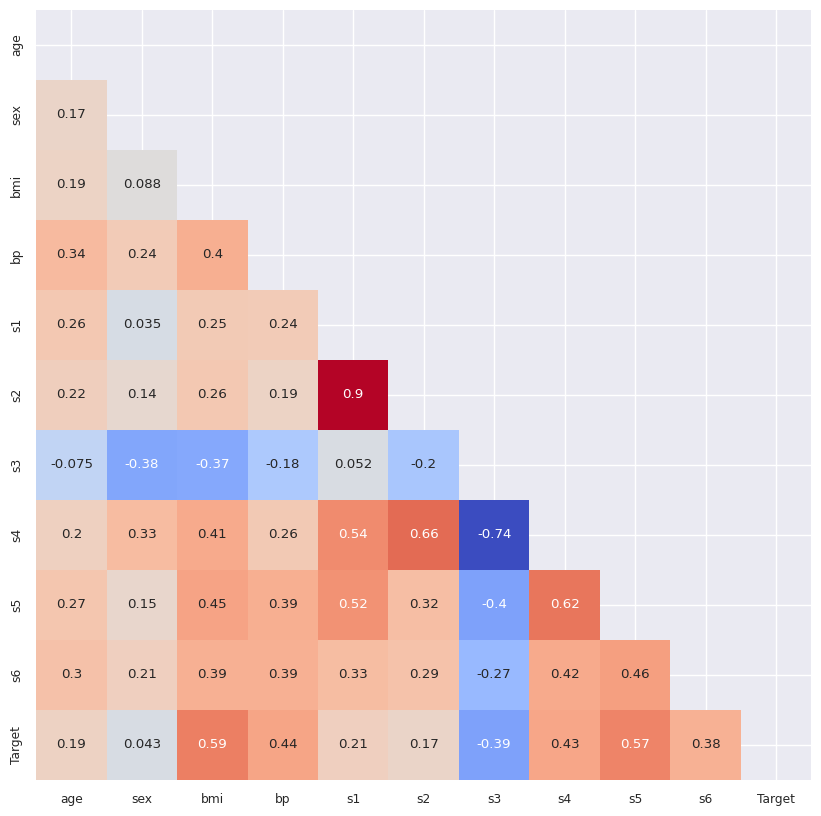

In [8]:
# 상관계수 행렬 계산
df_corr = df.corr()

# 상반 행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, mask=mask, annot=True, cbar=False, cmap='coolwarm')
plt.show()

In [9]:
# 변수 간의 상관관계 분석 - Target 변수와의 절대 상관계수를 내림차순으로 정렬
correlation_with_target = df_corr['Target'].abs().sort_values(ascending=False)
correlation_with_target


,Target
Target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s3,0.394789
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054


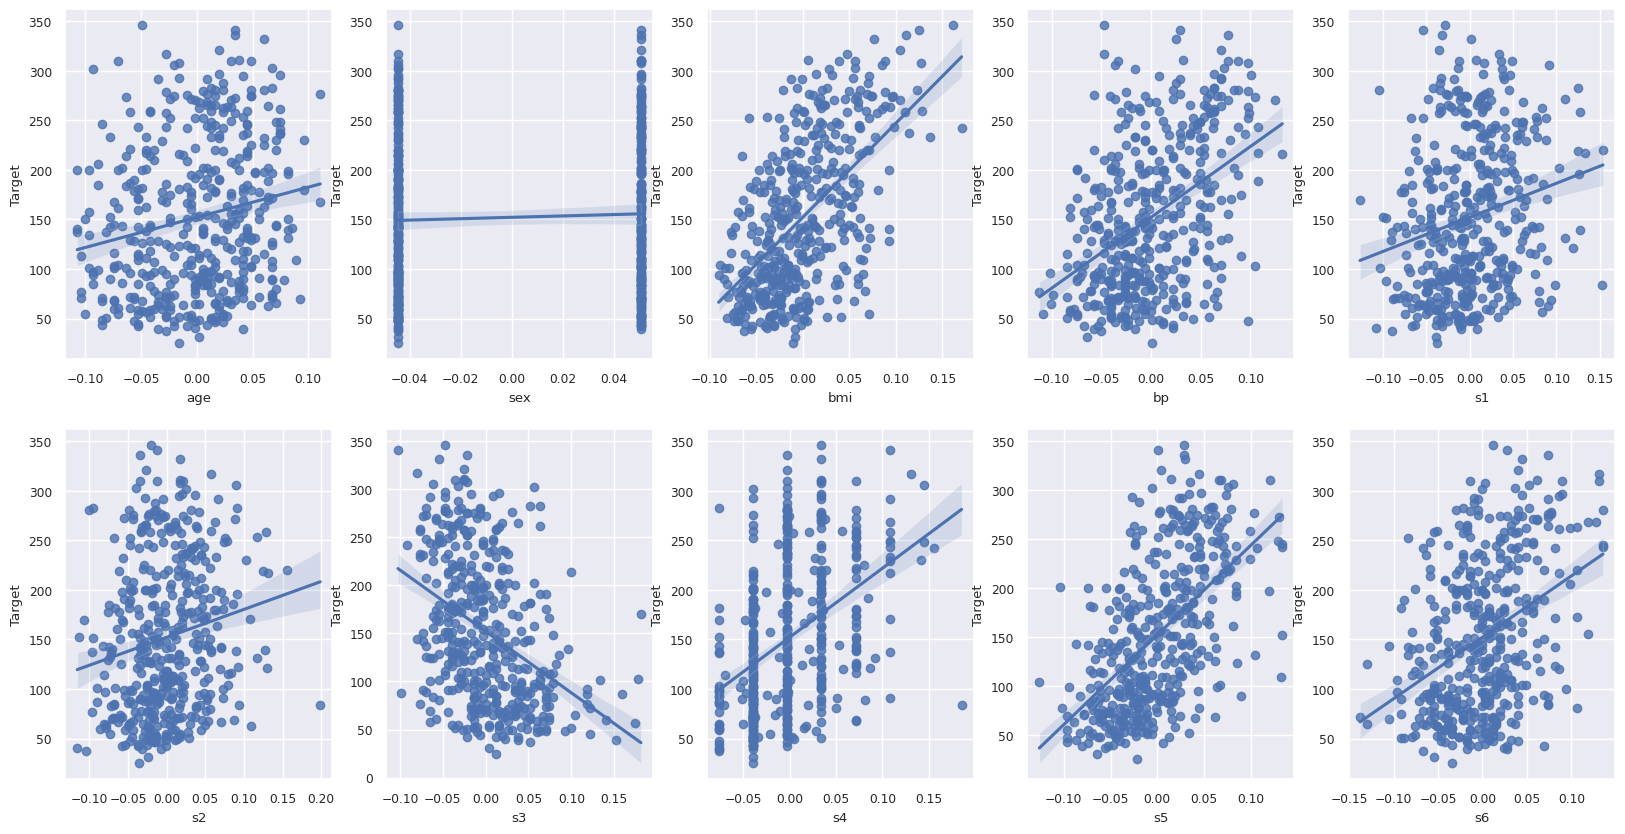

In [10]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(20,10))

for idx, col in enumerate(df.drop(columns=['Target']).columns):
    ax = plt.subplot(2, 5, idx+1)
    sns.regplot(x=col, y='Target', data=df, ax=ax)

plt.show()

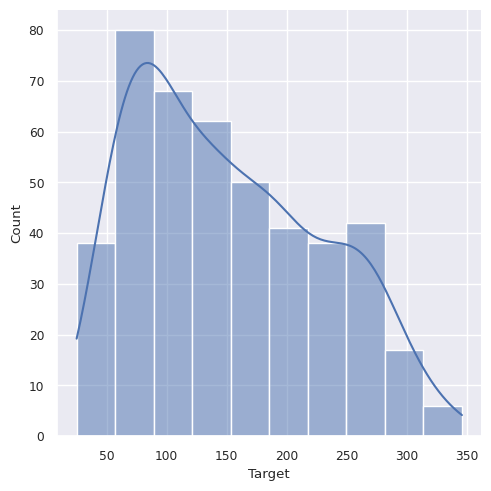

In [11]:
# Target 데이터의 분포
sns.displot(x='Target', kind='hist', data=df, kde=True)
plt.show()

# 데이터 전처리

### 학습용-테스트 데이터셋 분리하기

In [12]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_data = df.drop(columns=['Target'])
y_data = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [13]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
171,-0.020045,-0.044642,-0.046085,-0.098627,-0.075870,-0.059873,-0.017629,-0.039493,-0.051404,-0.046641
388,0.052606,0.050680,-0.024529,0.056301,-0.007073,-0.005072,-0.021311,-0.002592,0.026717,-0.038357
268,0.063504,0.050680,0.088642,0.070072,0.020446,0.037517,-0.050764,0.071210,0.029297,0.073480
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
427,-0.034575,0.050680,0.005650,-0.005670,-0.073119,-0.062691,-0.006584,-0.039493,-0.045424,0.032059


In [14]:
# 데이터 정규화 (평균 0, 표준편차 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.43352242, -0.94754919, -0.96759717, -2.06784653, -1.62321457,
        -1.28031188, -0.34752653, -0.85283184, -1.09555487, -1.00607735],
       [ 1.11775394,  1.05535418, -0.5166905 ,  1.14245824, -0.16810069,
        -0.12960055, -0.42494961, -0.08365113,  0.54338241, -0.83190114],
       [ 1.3504454 ,  1.05535418,  1.85056951,  1.42781867,  0.41394486,
         0.76466654, -1.04433423,  1.4547103 ,  0.59750367,  1.51947779],
       [-0.51108623, -0.94754919, -1.37341317, -1.711146  , -0.83745307,
        -1.14880202,  1.27835809, -1.62201255, -0.79607111, -0.91898925],
       [-0.74377769,  1.05535418,  0.11457883, -0.14166367, -1.56501001,
        -1.33949132, -0.1152573 , -0.85283184, -0.97010063,  0.64859671]])

# Baseline 모델 - 선형 회귀

In [15]:
# 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print ("회귀계수(기울기): ", np.round(lr.coef_, 1))
print ("상수항(절편): ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [ -1.9 -12.2  26.8  16.7 -48.9  34.6   7.9   6.1  39.6   2.4]
상수항(절편):  154.7


In [16]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 2726.9049
Test MSE: 3461.6628


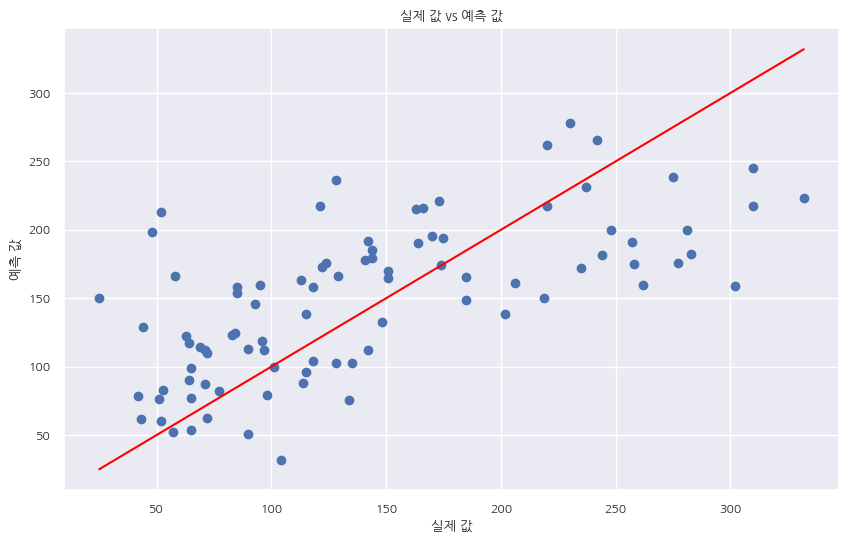

In [17]:
# 예측 결과 시각화
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 대각선
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값')
plt.show()

In [18]:
# 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 회귀모형 정의
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 입력층과 첫 번째 은닉층
model.add(Dense(32, activation='relu'))  # 두 번째 은닉층
model.add(Dense(1, activation='linear'))  # 출력층 (회귀 문제이므로 활성화 함수는 linear)

# 모델 구조
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

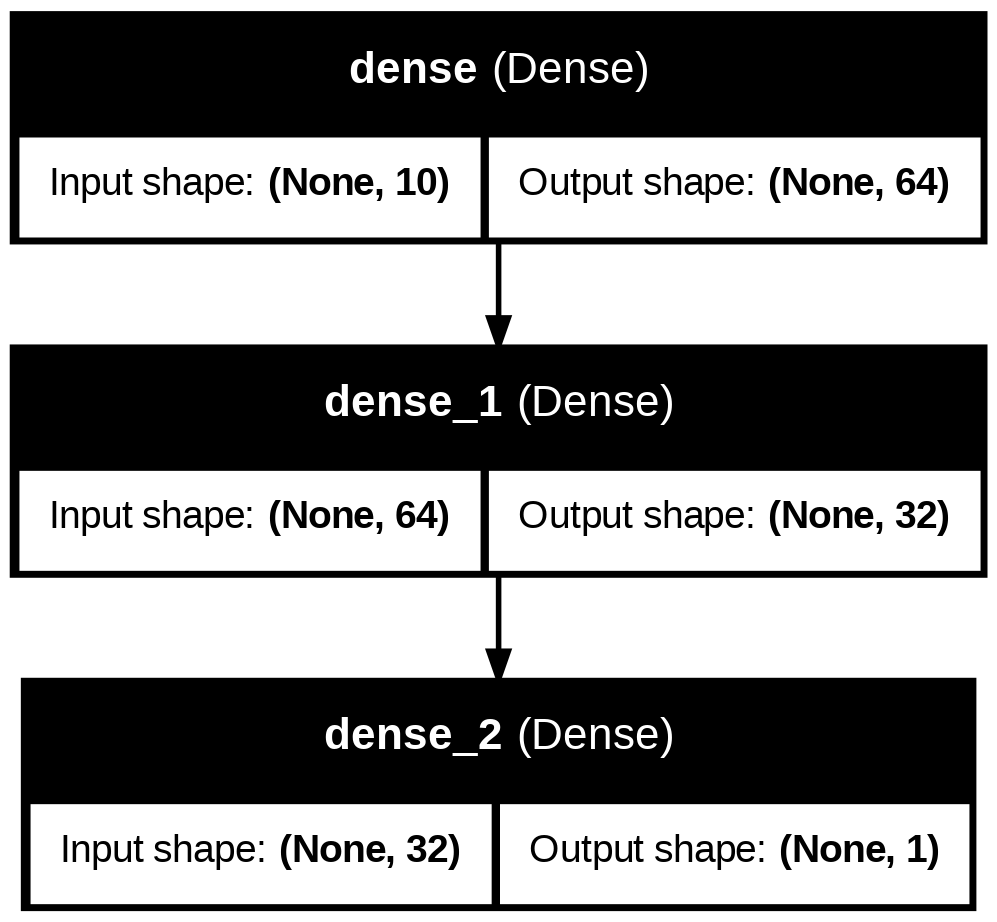

In [20]:
# 모델 구조 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [19]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# 모델 학습
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 26650.3984 - mean_absolute_error: 146.2471 - val_loss: 32990.9258 - val_mean_absolute_error: 163.9948
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30206.2422 - mean_absolute_error: 154.0152 - val_loss: 32771.6641 - val_mean_absolute_error: 163.3624
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28365.1172 - mean_absolute_error: 150.3080 - val_loss: 32558.7246 - val_mean_absolute_error: 162.7392
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26723.2539 - mean_absolute_error: 146.0789 - val_loss: 32312.9863 - val_mean_absolute_error: 162.0180
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26745.4492 - mean_absolute_error: 146.7501 - val_loss: 32005.4824 - val_mean_absolute_error: 161.1195
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29449.2695 - mean_absolute_error: 153.2830 - val_loss: 31616.1309 - val_mean_absolute_error: 159.9906
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [21]:
# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 세트의 평균 절대 오차 (MAE): {mae}")

# 예측
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3414.9155 - mean_absolute_error: 46.5202 
테스트 세트의 평균 절대 오차 (MAE): 45.17161178588867
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


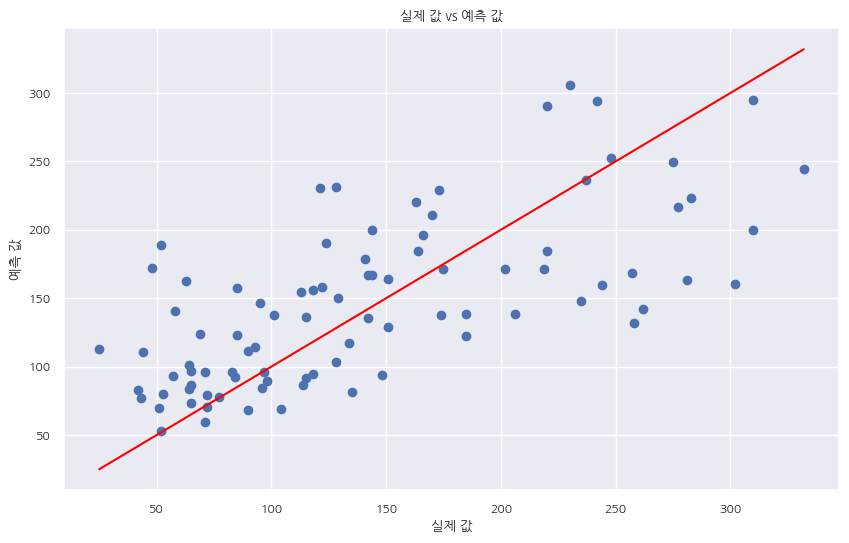

In [22]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 대각선
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값')
plt.show()